In [1]:
import scanpy as sc
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from matplotlib import rcParams
import seaborn as sns
os.chdir(os.getcwd())

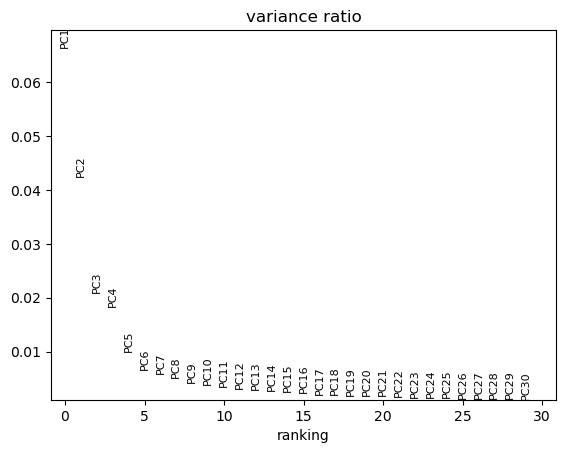

"\nsc.pp.neighbors(adata_pp, n_neighbors=15, n_pcs=11, metric='euclidean')\n\n#sc.tl.pca(adata_pp)\n#sc.pp.neighbors(adata_pp, n_neighbors=50, n_pcs=15, metric='euclidean')\nsc.tl.umap(adata_pp)\n\n"

In [2]:
## LOAD ADATA AND PATIENT METADATA
adata=sc.read_h5ad('../data/data_QC_norm.h5ad')

metadata=pd.read_excel('../data/ScSeq_Patinfo_270623.xlsx',header=1,index_col=0)
metadata.index=[x.replace(' ','') for x in metadata.index]

## Add metadata to .obs df of Anndata
met_cols_for_corr=['Age','Sex','Hypertension','AHA classification','Diabetes','Smoking','Dyslipidemia','CHD','BMI','Statin']
for met_col in met_cols_for_corr:
    d=pd.Series(metadata[met_col],index=metadata.index).to_dict()
    adata.obs[met_col]=adata.obs['patient'].map(d)

## Add new column to .obs where Diseased cells get further split up as 'stable' or 'unstable'
adata.obs['Stability']=adata.obs['condition']
d=pd.Series(metadata['stability (+/-)'],index=metadata.index).to_dict()
adata.obs['Stability']=adata.obs['patient'].map(d)
adata.obs['Stability']=adata.obs['Stability'].replace({r'+':'unstable',r'-':'stable'})
adata.obs.loc[adata.obs['condition']=='H','Stability']='healthy'


## Use the previously normalised layers for determination of PCA component numbers
adata_pp=adata.copy()
adata_pp.X=adata_pp.layers['acosh'].copy()


sc.pp.pca(adata_pp,n_comps=30, use_highly_variable=False)
sc.pl.pca_variance_ratio(adata_pp)

'''
sc.pp.neighbors(adata_pp, n_neighbors=15, n_pcs=11, metric='euclidean')

#sc.tl.pca(adata_pp)
#sc.pp.neighbors(adata_pp, n_neighbors=50, n_pcs=15, metric='euclidean')
sc.tl.umap(adata_pp)

'''

In [3]:
batch_eff=['preparation_kit','patient','batch']
adata_pp.obs['bbknn_batch']=adata_pp.obs[batch_eff].agg('-'.join, axis=1)

In [4]:
import bbknn

adata.layers['counts']=adata.X.copy()
sc.pp.highly_variable_genes(
        adata,
        n_top_genes=4000,
        subset=False,
        layer='counts',
        flavor="seurat_v3",
        batch_key='batch')

cells_hvg=adata[:,adata.var['highly_variable']==True]       

/Users/daniel.garger/anaconda3/envs/scvi/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/daniel.garger/anaconda3/envs/scvi/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/daniel.garger/anaconda3/envs/scvi/lib/python3.8/site-

In [5]:
sc.pp.pca(adata_pp, n_comps=50, use_highly_variable = False)
sc.pp.neighbors(adata_pp,n_neighbors=15,n_pcs=12)
sc.tl.umap(adata_pp)

/Users/daniel.garger/anaconda3/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/daniel.garger/anaconda3/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/daniel.garger/anaconda3/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'preparation_kit'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'batch'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'patient'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'Age'}, xlabel='UMAP1', ylabel='UMAP2'>]

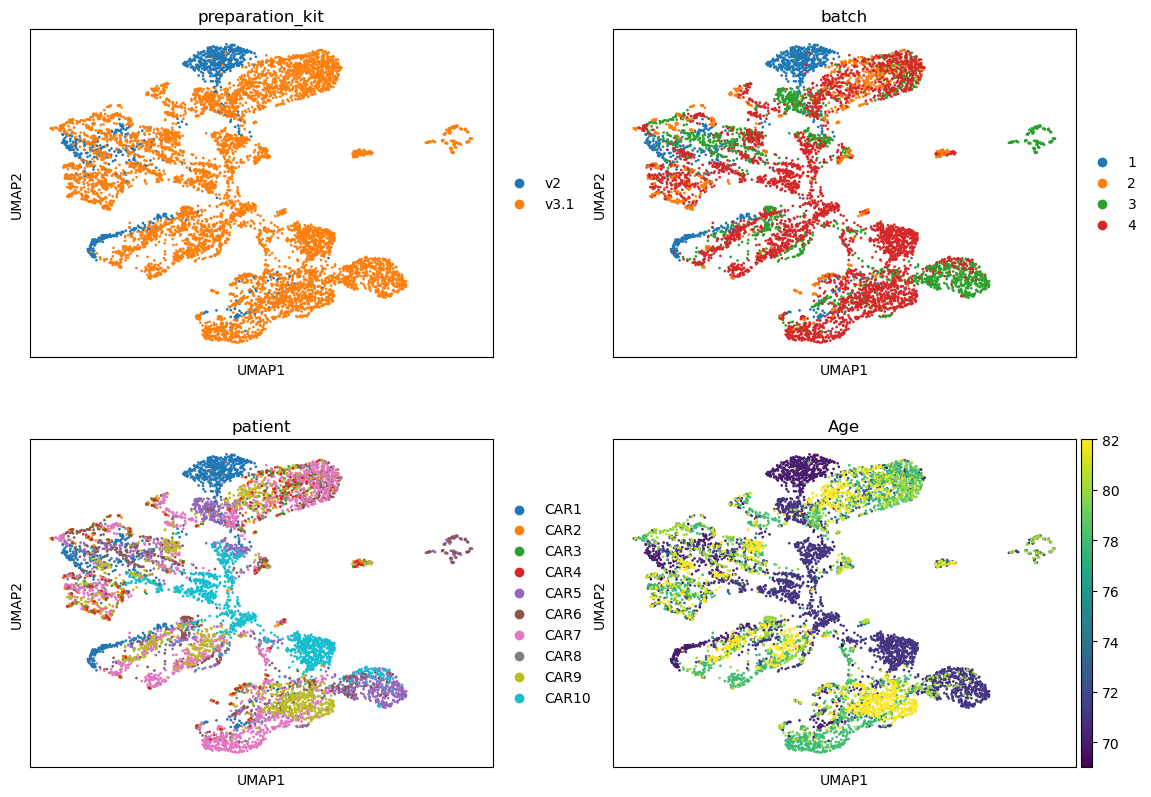

In [6]:
rcParams['figure.figsize']=(6,4.5)
sc.pl.umap(adata_pp, color=['preparation_kit','batch','patient','Age'],show=False,size=15,ncols=2)

In [14]:
bbknn_res=bbknn.bbknn(adata_pp, neighbors_within_batch=15, batch_key='patient',copy=True,annoy_n_trees=30)

/Users/daniel.garger/anaconda3/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/daniel.garger/anaconda3/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/daniel.garger/anaconda3/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/daniel.garger/anaconda3/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/daniel.garger/anaconda3/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWar

[<Axes: title={'center': 'preparation_kit'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'batch'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'patient'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'Age'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'bbknn_batch'}, xlabel='UMAP1', ylabel='UMAP2'>]

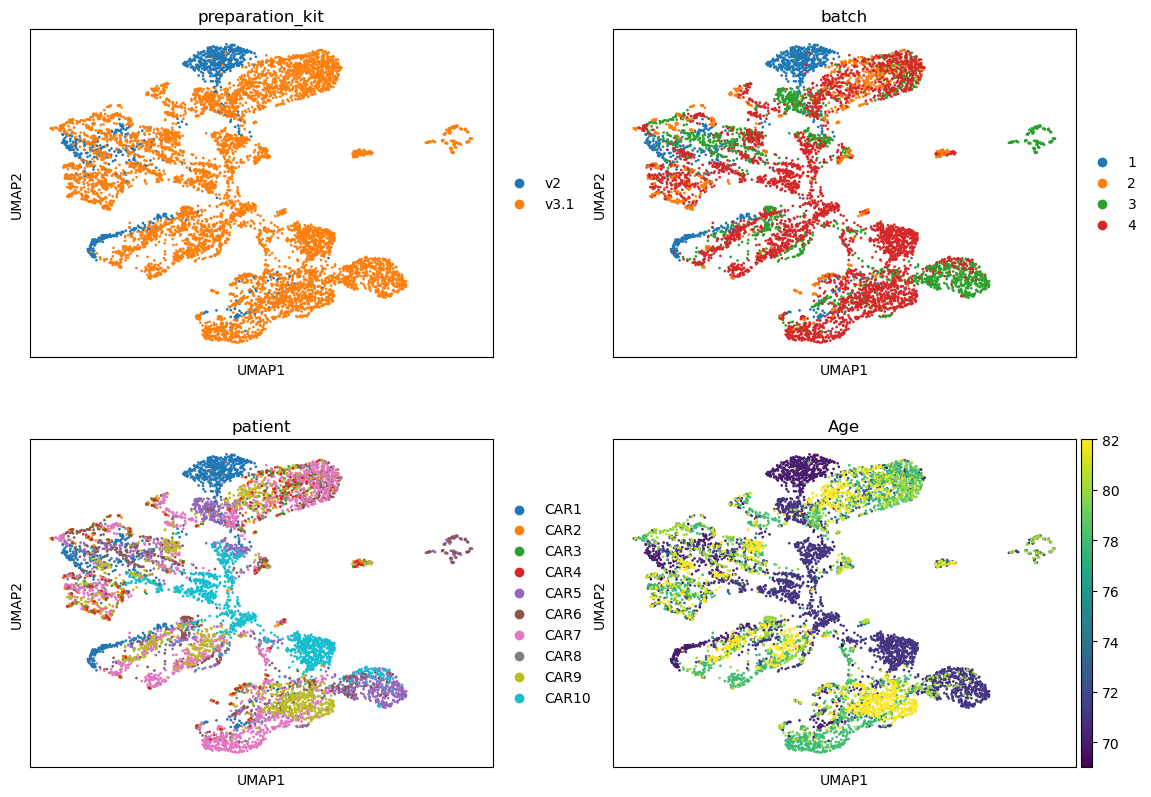

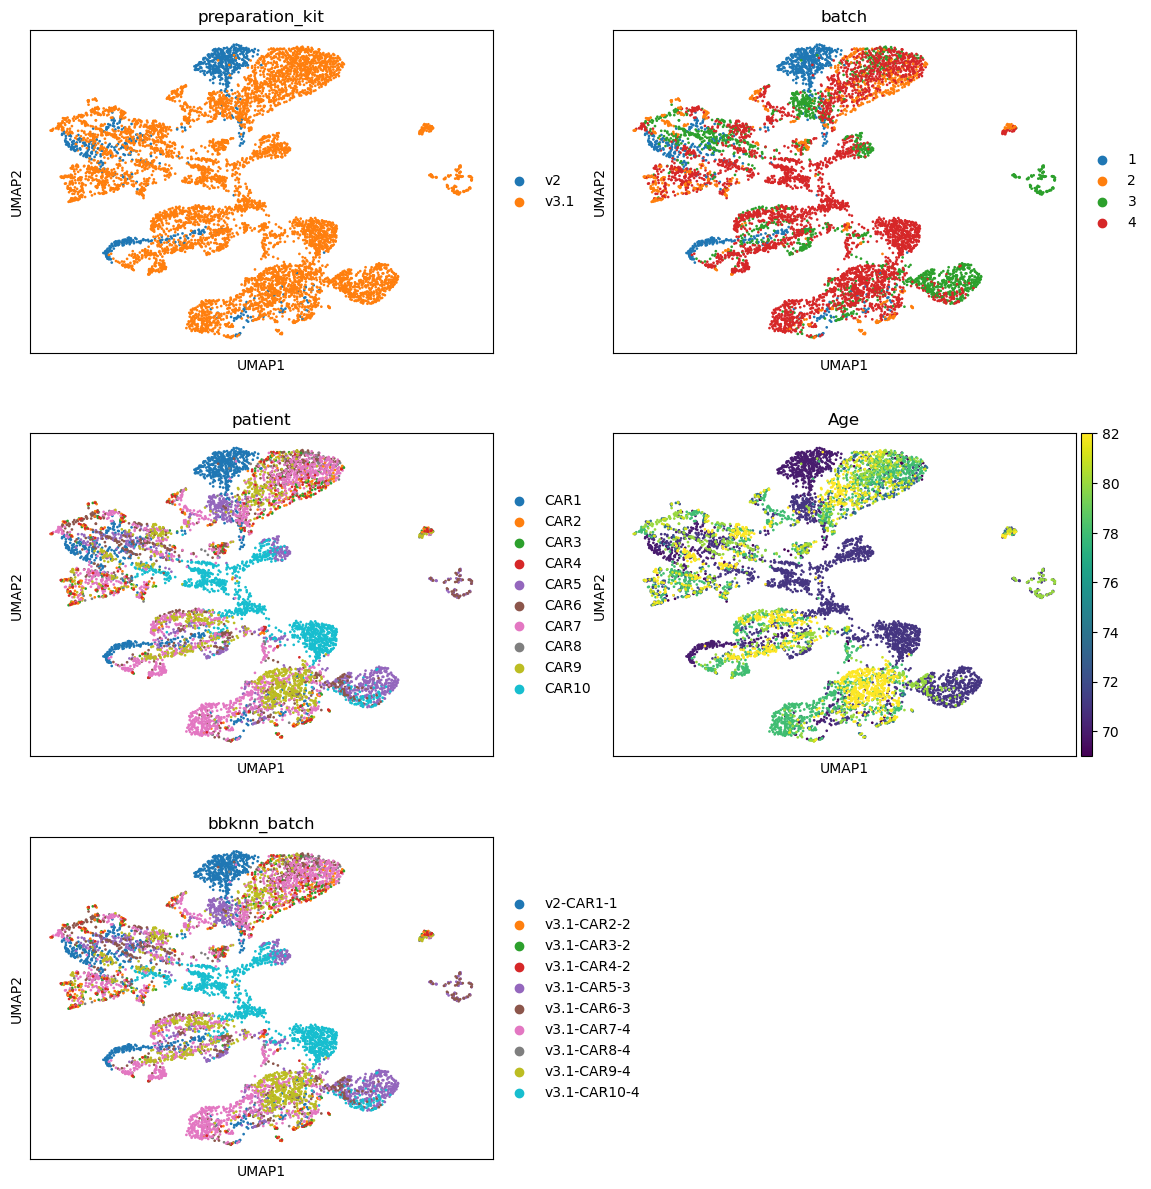

In [16]:
sc.pp.neighbors(bbknn_res,n_neighbors=15,n_pcs=12)
sc.tl.umap(bbknn_res,random_state = 1712)
rcParams['figure.figsize']=(6,4.5)
sc.pl.umap(adata_pp,color=['preparation_kit','batch','patient','Age'],show=False,size=15,ncols=2)
sc.pl.umap(bbknn_res,color=['preparation_kit','batch','patient','Age','bbknn_batch'],show=False,size=15,ncols=2)